In [2]:
import h5py, matplotlib.pyplot as plt, numpy as np, os, pandas as pd, sys

BEG_TEST = '../data/TestData/'

dfAgeSex = pd.read_csv(BEG_TEST + 'attributes.csv')
with h5py.File(BEG_TEST + 'ecg_tracings.hdf5') as f:
    M = np.array(f['tracings'])
dfLabels = pd.read_csv(BEG_TEST + 'annotations' + os.sep + 'gold_standard.csv')

In [3]:
dfLabels

,1dAVb,RBBB,LBBB,SB,AF,ST
0,0,0,0,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
822,0,0,0,0,0,0
823,0,0,0,0,0,0
824,0,0,0,0,0,0
825,0,0,0,0,0,0


In [4]:
ELETRODO_IDX = 0

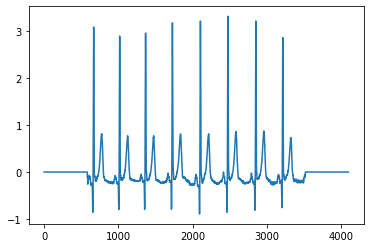

In [5]:
plt.plot(M[0,:,ELETRODO_IDX])

In [6]:
labels = dfLabels.values
labels.shape

(827, 6)

In [7]:
N = len(labels)
LABELS = '1dAVb	RBBB	LBBB	SB	AF	ST'.split()
tipos = [[] for i in range(6)]
for i in range(N):
    row = labels[i]
    if row.sum() == 1:
        ecg = M[i, :, ELETRODO_IDX]
        tipos[row.argmax()].append(ecg)

In [8]:
M.shape

(827, 4096, 12)

matplotlib.figure.Figure

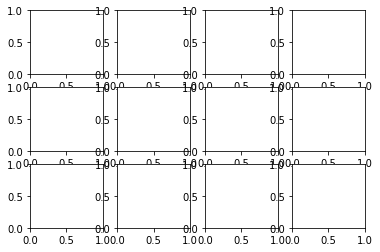

In [18]:
fig, axs = plt.subplots(3, 4)
type(fig)

[0 0 0 0 0 0]


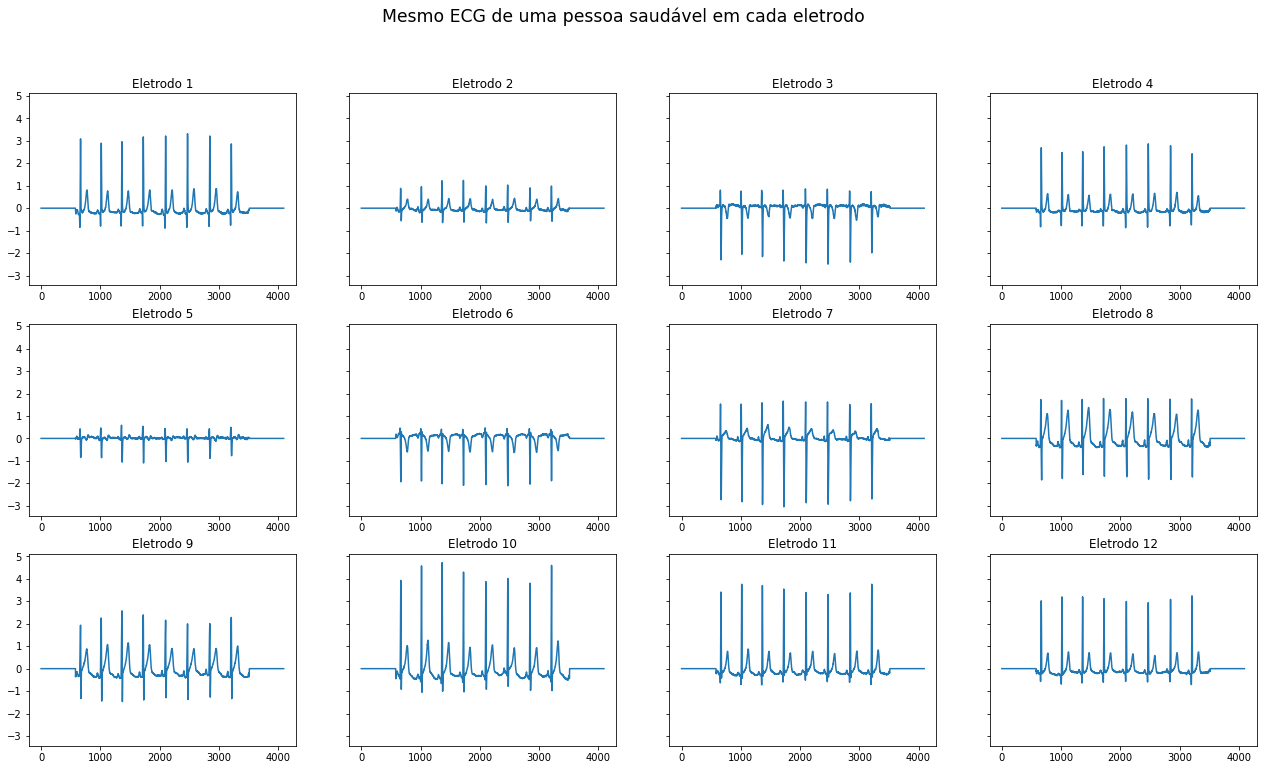

In [30]:
# exemplo do mesmo ecg em cada eletrodo
pessoa = 0
print(labels[pessoa])
fig, axs = plt.subplots(3, 4, sharey=True, figsize=(22, 12))
for i in range(12):
    ecg = M[pessoa, :, i]
    row = i // 4
    col = i % 4
    ax = axs[row, col]
    ax.plot(ecg)
    ax.set_title('Eletrodo ' + str(i + 1))
fig.suptitle('Mesmo ECG de uma pessoa saudável em cada eletrodo', fontsize='xx-large')
plt.show()

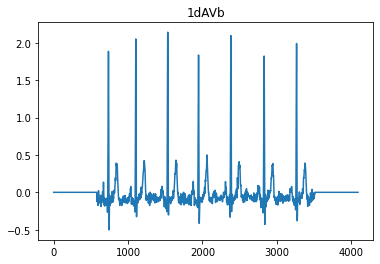

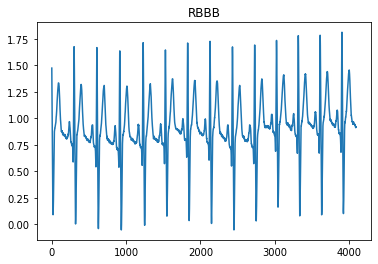

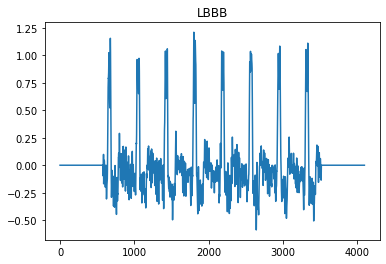

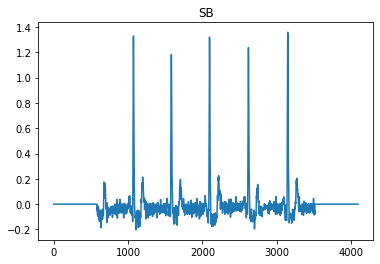

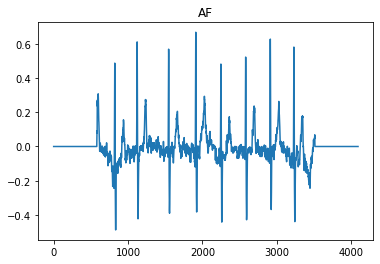

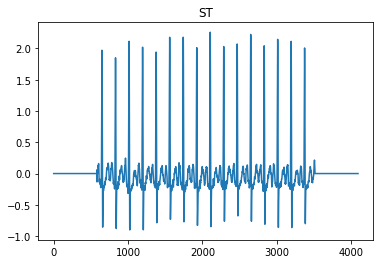

In [42]:
# um exemplo de cada doença sozinha no eletrodo 0
rng = np.random.default_rng(243)
for i in range(6):
    tipo = tipos[i]
    exemplo = rng.choice(tipo)
    plt.plot(exemplo)
    plt.title(LABELS[i])
    plt.show()

In [35]:
BEG_TREINO = '../data/TrainData/'
for i in range(18):
    with h5py.File(BEG_TREINO + 'exams_part' + str(i) + '.hdf5') as f:
        M = np.array(f['tracings'])
        print(M.shape)

(20001, 4096, 12)
(20001, 4096, 12)
(20001, 4096, 12)
(20001, 4096, 12)
(20001, 4096, 12)
(20001, 4096, 12)
(20001, 4096, 12)
(20001, 4096, 12)
(20001, 4096, 12)
(20001, 4096, 12)
(20001, 4096, 12)
(20001, 4096, 12)
(20001, 4096, 12)
(20001, 4096, 12)
(20001, 4096, 12)
(20001, 4096, 12)
(20001, 4096, 12)
(5780, 4096, 12)


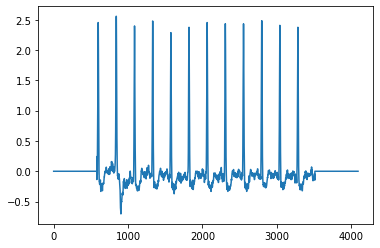

In [39]:
plt.plot(M[-4,:,0])